In [1]:
import pandas as pd
import os

# Define the path to the resource folder where the CSV files are located
resource_folder = 'Resources'

# Initialize an empty list to store the DataFrames from each year
dataframes = []

# Create a list of file names for each year
years = range(2013, 2024)
csv_files = [f'videos_{year}.csv' for year in years]

# Read each CSV file and append the DataFrame to the list
for csv_file in csv_files:
    # Construct the full file path
    file_path = os.path.join(resource_folder, csv_file)
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    # Append the DataFrame to the list
    dataframes.append(df)
    print(f'Read data from {csv_file}')

# Concatenate all DataFrames into one DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Export the combined DataFrame to a single CSV file
output_file_path = 'combined_videos.csv'
combined_df.to_csv(output_file_path, index=False)
print(f'Combined data exported to {output_file_path}')

Read data from videos_2013.csv
Read data from videos_2014.csv
Read data from videos_2015.csv
Read data from videos_2016.csv
Read data from videos_2017.csv
Read data from videos_2018.csv
Read data from videos_2019.csv
Read data from videos_2020.csv
Read data from videos_2021.csv
Read data from videos_2022.csv
Read data from videos_2023.csv
Combined data exported to combined_videos.csv


In [2]:
combined_df.head()
combined_df.count()

id              2450
published_at    2450
length          2439
views           1485
dtype: int64

In [3]:
rows_with_na = combined_df[combined_df['views'].isna()]

# Print the rows with 'N/A' or empty values in the 'views' column
print(rows_with_na)

               id          published_at    length  views
8     8jUDBvwjiwA  2013-04-06T13:00:38Z  PT21M54S    NaN
14    LX-RyB_YC-s  2013-11-11T07:39:45Z  PT23M16S    NaN
26    YO4ULN9X5XU  2013-06-11T16:35:14Z   PT42M1S    NaN
35    t81pGGYeG1c  2013-06-10T03:45:13Z  PT21M12S    NaN
36    _FJvbResgpw  2013-02-25T10:09:57Z  PT23M57S    NaN
...           ...                   ...       ...    ...
2311  fSz-qloVYK4  2022-12-02T09:34:59Z  PT23M58S    NaN
2418  Z6tMj3Kz-Kw  2023-03-09T05:02:04Z  PT42M36S    NaN
2424  rsYhZLeZbUw  2023-12-22T20:32:22Z  PT23M50S    NaN
2426  Y_16eHrArVg  2023-05-12T04:02:02Z  PT21M15S    NaN
2427  O5TOxcNnMTY  2023-04-26T07:13:54Z   PT42M6S    NaN

[965 rows x 4 columns]


In [4]:
# Filter the DataFrame to keep rows where the 'length' column is not equal to 'P0D'
cleaned_df = combined_df[combined_df['length'] != 'P0D']

rows_with_na = combined_df[combined_df['length'].isna()]

# Print the cleaned DataFrame (optional)
print(cleaned_df)

               id          published_at   length       views
0     pjAJswDB14s  2013-11-08T20:03:07Z   PT1M3S    145004.0
1     qMkYlIA7mgw  2013-06-05T21:35:43Z  PT4M42S  26994739.0
2     T8WpJlaZNZI  2013-11-08T20:12:12Z   PT1M4S     34840.0
3     KfWNOnns1FM  2013-10-10T08:29:45Z  PT4M18S      1814.0
4     81pvnaj3EI4  2013-11-08T20:15:38Z    PT36S     34449.0
...           ...                   ...      ...         ...
2441  f2LFo3t8rGQ  2023-06-05T17:26:47Z    PT29S     30920.0
2443  j8v2xQfF2BQ  2023-12-18T06:35:00Z     PT6S      5716.0
2444  iCog3FfNGI4  2023-06-06T13:35:00Z    PT10S     19399.0
2445  UEC2Q8oTDDA  2023-10-22T09:05:00Z     PT7S     13747.0
2446  1G3c0j4UnLc  2023-05-23T00:42:23Z    PT27S     41675.0

[2346 rows x 4 columns]


In [5]:
output_file_path = 'cleaned_videos.csv'
cleaned_df.to_csv(output_file_path, index=False)
print(f'Cleaned data exported to {output_file_path}')

Cleaned data exported to cleaned_videos.csv


In [6]:
# Use a regular expression to extract minutes and seconds from the 'length' column
combined_df[['length_minutes', 'length_seconds']] = combined_df['length'].str.extract(r'PT(?:(\d+)M)?(?:(\d+)S)?')

# Convert the extracted values to numeric (floats)
combined_df['length_minutes'] = pd.to_numeric(combined_df['length_minutes'], errors='coerce').fillna(0)
combined_df['length_seconds'] = pd.to_numeric(combined_df['length_seconds'], errors='coerce').fillna(0)

# Calculate the total length in seconds
combined_df['length_seconds_total'] = (combined_df['length_minutes'] * 60) + combined_df['length_seconds']

# Print the first few rows to verify the changes
print(combined_df.head())

            id          published_at   length       views  length_minutes  \
0  pjAJswDB14s  2013-11-08T20:03:07Z   PT1M3S    145004.0             1.0   
1  qMkYlIA7mgw  2013-06-05T21:35:43Z  PT4M42S  26994739.0             4.0   
2  T8WpJlaZNZI  2013-11-08T20:12:12Z   PT1M4S     34840.0             1.0   
3  KfWNOnns1FM  2013-10-10T08:29:45Z  PT4M18S      1814.0             4.0   
4  81pvnaj3EI4  2013-11-08T20:15:38Z    PT36S     34449.0             0.0   

   length_seconds  length_seconds_total  
0             3.0                  63.0  
1            42.0                 282.0  
2             4.0                  64.0  
3            18.0                 258.0  
4            36.0                  36.0  


In [7]:
# Convert the 'published_at' column to datetime data type
combined_df['published_at'] = pd.to_datetime(combined_df['published_at'])

# Extract the year from the 'published_at' column
combined_df['year'] = combined_df['published_at'].dt.year

# Print the first few rows to verify the changes
print(combined_df.head())

            id              published_at   length       views  length_minutes  \
0  pjAJswDB14s 2013-11-08 20:03:07+00:00   PT1M3S    145004.0             1.0   
1  qMkYlIA7mgw 2013-06-05 21:35:43+00:00  PT4M42S  26994739.0             4.0   
2  T8WpJlaZNZI 2013-11-08 20:12:12+00:00   PT1M4S     34840.0             1.0   
3  KfWNOnns1FM 2013-10-10 08:29:45+00:00  PT4M18S      1814.0             4.0   
4  81pvnaj3EI4 2013-11-08 20:15:38+00:00    PT36S     34449.0             0.0   

   length_seconds  length_seconds_total  year  
0             3.0                  63.0  2013  
1            42.0                 282.0  2013  
2             4.0                  64.0  2013  
3            18.0                 258.0  2013  
4            36.0                  36.0  2013  


In [8]:
data_df = combined_df[['id', 'year', 'views', 'length_seconds_total']]
data_df = data_df.rename(columns={
    'id': 'ID',
    'year': 'Year',
    'views': 'View Count',
    'length_seconds_total': 'Length (s)'
})
data_df = data_df[data_df['Length (s)'] != 'NaN']
data_df = data_df[data_df['View Count'] != '0']
data_df.value_counts()

filename = 'data_df.csv'



data_df_views = data_df.dropna(subset=['View Count'])
data_df_length = data_df_views[data_df_views['Length (s)'] > 0]

# Print the number of rows removed (optional)
rows_removed = len(data_df_views) - len(data_df_length)
output_file_path = 'cleamed_data3.csv'
data_df_length.to_csv(output_file_path, index=False)


In [9]:
row_counts_by_year = data_df_length.groupby('Year').size()
print(row_counts_by_year)

Year
2013    119
2014    119
2015    127
2016    132
2017    132
2018    142
2019    158
2020    120
2021    122
2022     99
2023     87
dtype: int64


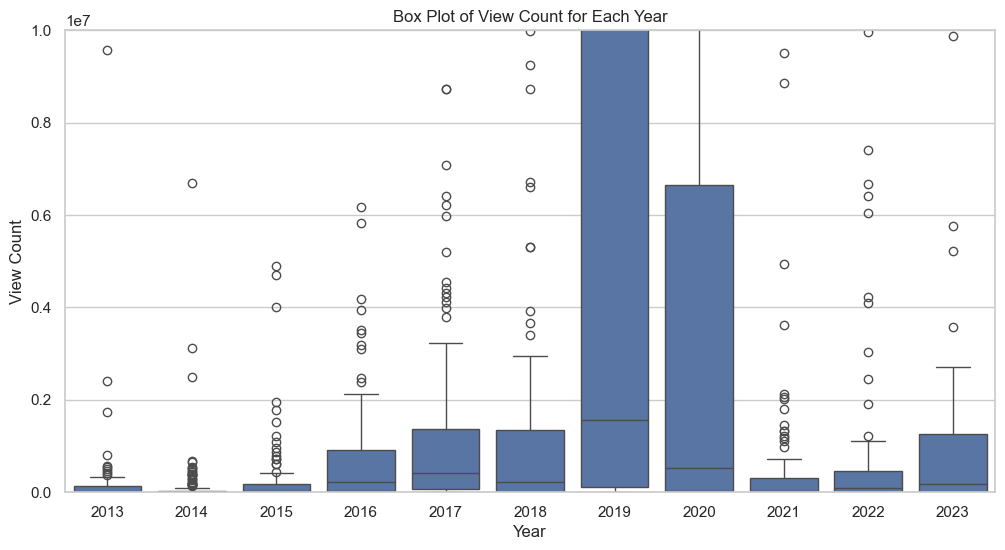

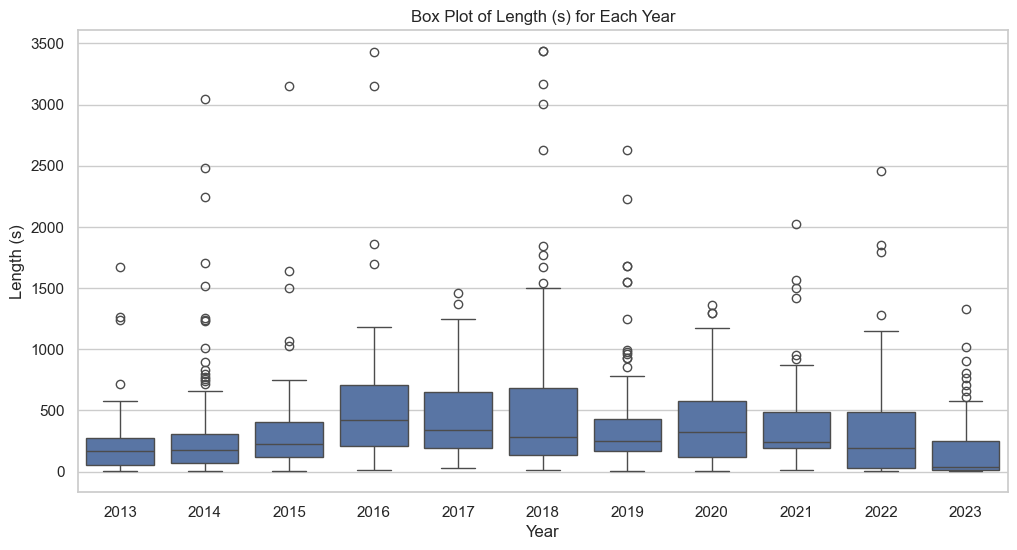

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called data_df

# Set the style for seaborn
sns.set(style='whitegrid')

# Create a box plot for 'View Count' values for each year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='View Count', data=data_df_length)
plt.ylim(0, 1e7)
# Add a title to the plot
plt.title('Box Plot of View Count for Each Year')

# Show the plot
plt.show()

# Create a box plot for 'Length (s)' values for each year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Length (s)', data=data_df_length)

# Add a title to the plot
plt.title('Box Plot of Length (s) for Each Year')

# Show the plot
plt.show()

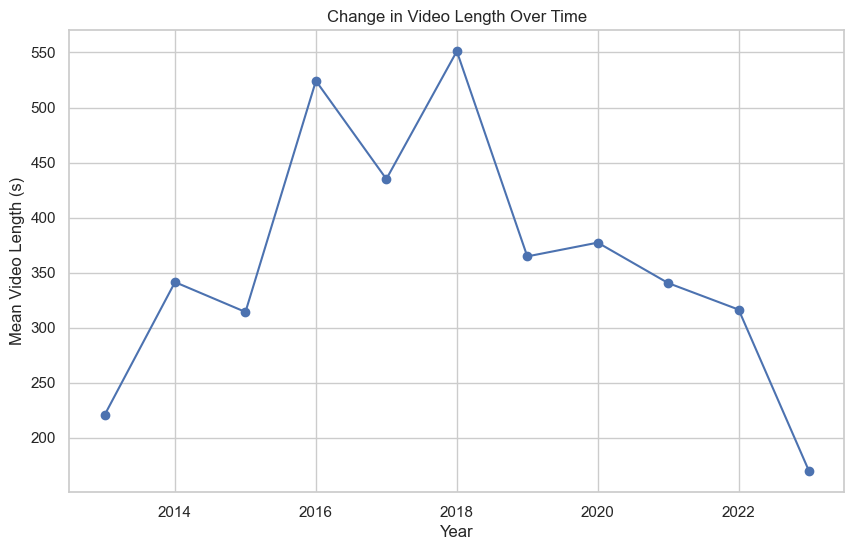

In [11]:
data_df['Year'] = pd.to_datetime(combined_df['published_at']).dt.year

# Calculate the mean video length per year
mean_length_per_year = data_df_length.groupby('Year')['Length (s)'].mean()

# Plot the line graph of change in video length over time
plt.figure(figsize=(10, 6))
plt.plot(mean_length_per_year.index, mean_length_per_year.values, marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Mean Video Length (s)')
plt.title('Change in Video Length Over Time')

# Show the plot
plt.show()

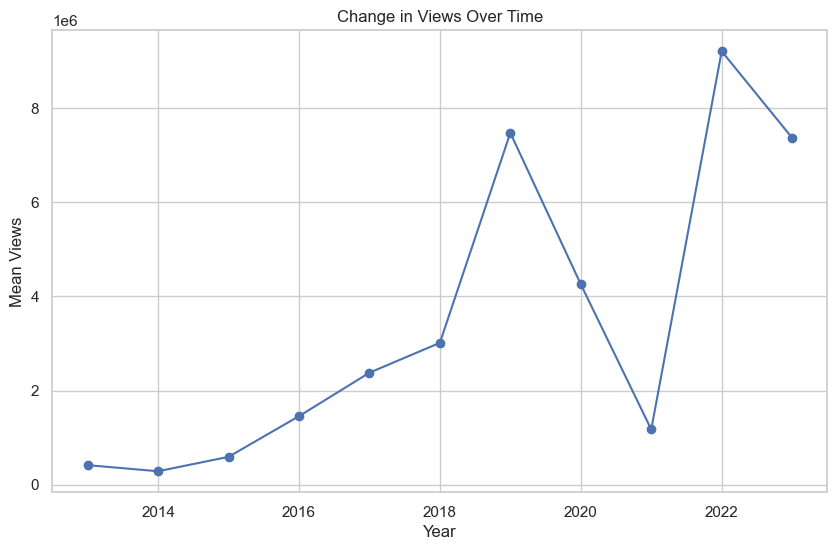

In [12]:

# Calculate the mean video length per year
mean_length_per_year = data_df_length.groupby('Year')['View Count'].mean()

# Plot the line graph of change in video length over time
plt.figure(figsize=(10, 6))
plt.plot(mean_length_per_year.index, mean_length_per_year.values, marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Mean Views')
plt.title('Change in Views Over Time')

# Show the plot
plt.show()

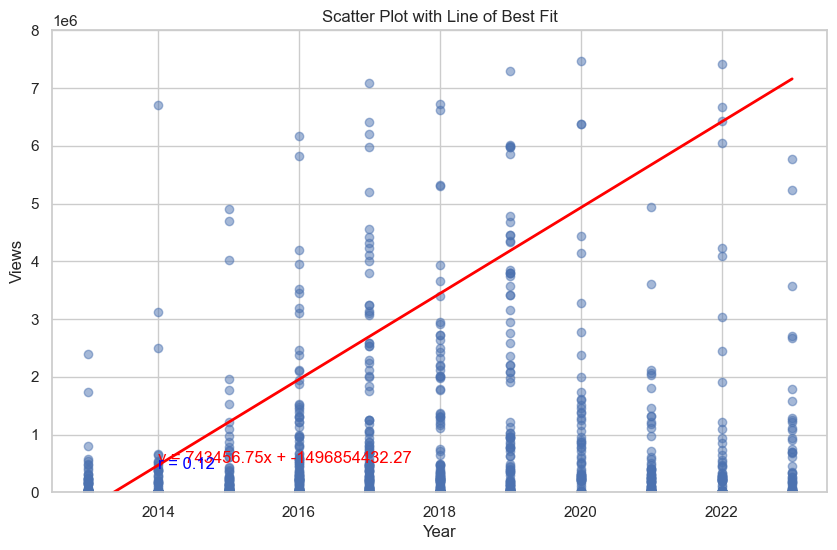

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

# Scatter plot of all data points
plt.figure(figsize=(10, 6))
plt.scatter(data_df_length['Year'], data_df_length['View Count'], marker='o', alpha=0.5)

# Perform linear regression
X = data_df_length['Year'].values.reshape(-1, 1)
y = data_df_length['View Count'].values
model = LinearRegression()
model.fit(X, y)

# Calculate the correlation coefficient (r value)
r, _ = pearsonr(data_df_length['Year'], data_df_length['View Count'])

# Plot the line of best fit
plt.plot(data_df_length['Year'], model.predict(X), color='red', linewidth=2)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Views')
plt.title('Scatter Plot with Line of Best Fit')

# Set y-axis limit to 2 million
plt.ylim(0, 8e6)

# Annotate the line of best fit with its equation and r value
equation = f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}'
r_text = f'r = {r:.2f}'
plt.text(2014, 0.5e6, equation, color='red', fontsize=12)
plt.text(2014, 0.4e6, r_text, color='blue', fontsize=12)

# Show the plot
plt.show()


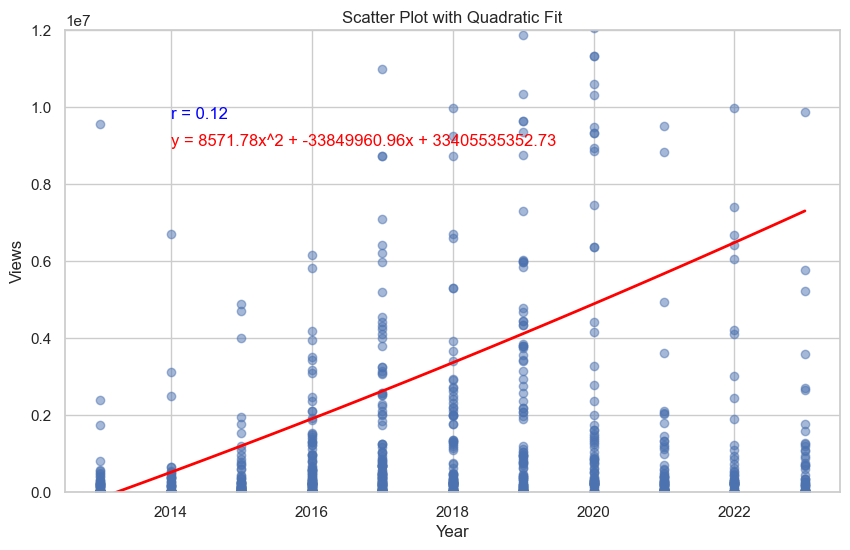

3

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatter plot of all data points
plt.figure(figsize=(10, 6))
plt.scatter(data_df_length['Year'], data_df_length['View Count'], marker='o', alpha=0.5)

# Perform quadratic curve fitting
coefficients = np.polyfit(data_df_length['Year'], data_df_length['View Count'], 2)
p = np.poly1d(coefficients)

# Calculate the correlation coefficient (r value)
r, _ = pearsonr(data_df_length['Year'], data_df_length['View Count'])

# Plot the fitted quadratic curve
x_values = np.linspace(min(data_df_length['Year']), max(data_df_length['Year']), 100)
y_values = p(x_values)
plt.plot(x_values, y_values, color='red', linewidth=2)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Views')
plt.title('Scatter Plot with Quadratic Fit')

# Set y-axis limit to 2 million
plt.ylim(0, 12e6)

# Annotate the quadratic equation and r value
equation = f'y = {coefficients[0]:.2f}x^2 + {coefficients[1]:.2f}x + {coefficients[2]:.2f}'
r_text = f'r = {r:.2f}'
plt.text(2014, 9e6, equation, color='red', fontsize=12)
plt.text(2014, 9.7e6, r_text, color='blue', fontsize=12)

# Show the plot
plt.show()
3

In [15]:
import pandas as pd

# Assuming you have a DataFrame called data_df with columns 'Year', 'View Count', and 'Length (s)'

# Select the columns of interest
columns_of_interest = ['View Count', 'Length (s)']

# Calculate the correlation matrix
correlation_matrix = data_df_length[columns_of_interest].corr()

# Print the correlation coefficients
print('Correlation Coefficients:')
print(correlation_matrix)


Correlation Coefficients:
            View Count  Length (s)
View Count    1.000000   -0.042956
Length (s)   -0.042956    1.000000
